In [1]:
import numpy as np
from numba import jit, float64

@jit(float64[:](float64[:], float64), nopython=True)
def thomas_attractor(xyz, b):
    ''' ODE for Thomas attractor
        xyz: point position, 1d array, float64
        b: coefficient, float64
        
        use numba JIT
    '''
    sin_xyz = np.sin(xyz)
    dYdt = -b*xyz
    dYdt[0] += sin_xyz[1]
    dYdt[1] += sin_xyz[2]
    dYdt[2] += sin_xyz[0]
    return dYdt

In [71]:
import matplotlib.pyplot as plt

In [124]:
def circle(u):
    x, y, z = u
    dudt = np.array([y, -x, 0])
    return dudt/np.sqrt(np.sum(dudt**2))

In [132]:
def step(xyz):
    v = circle(xyz)
    v = v/np.sqrt(np.sum(v**2))

    cube_half_size_px = 500
    cube_half_size = 8

    dx = 0.01#cube_half_size/cube_half_size_px

    ijk, delta_xyz = np.divmod(xyz, dx)

    delta_xyz = np.hstack([delta_xyz, dx - delta_xyz])
    v_nan = np.hstack([v, v])
    v_nan[np.abs(v_nan)<1e-10] = np.NaN
    delta_xyz[np.abs(delta_xyz)<1e-10] = np.NaN
    dt_xyz = np.abs( delta_xyz/v_nan )

    next_face_id = np.nanargmin(dt_xyz)

    d_xyz = v*dt_xyz[next_face_id]
    #print(delta_xyz)
    return xyz + d_xyz

In [133]:
xyz = np.array([1.0, 0., 0], dtype=np.float64)

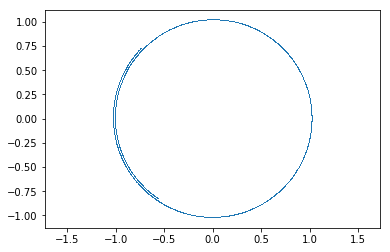

In [135]:
sol = []
for _ in range(2000):
    xyz = step(xyz)
    sol.append(xyz)

sol = np.array(sol)

plt.plot(sol[:, 0], sol[:, 1], ',');
plt.axis('equal');

In [87]:
sol

array([[1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ],
       [1.008 , 2.4968, 0.    ]])

In [63]:
xyz = np.array([1, 2.5, 0], dtype=np.float64)
v = circle(xyz)
v = v/np.sqrt(np.sum(v**2))

cube_half_size_px = 500
cube_half_size = 8

dx = cube_half_size/cube_half_size_px

ijk, delta_xyz = np.divmod(xyz, dx)

v_nan = np.copy(v)
v_nan[np.abs(v)<1e-10] = np.NaN
dt_xyz = delta_xyz/v_nan

next_face_id = np.nanargmin(np.abs(dt_xyz))

d_xyz = v*dt_xyz[next_face_id]


In [64]:
d_xyz

array([ 0.008 , -0.0032,  0.    ])

In [59]:
1/np.nan

nan